In [2]:
import pandas as pd
from pykrx import stock

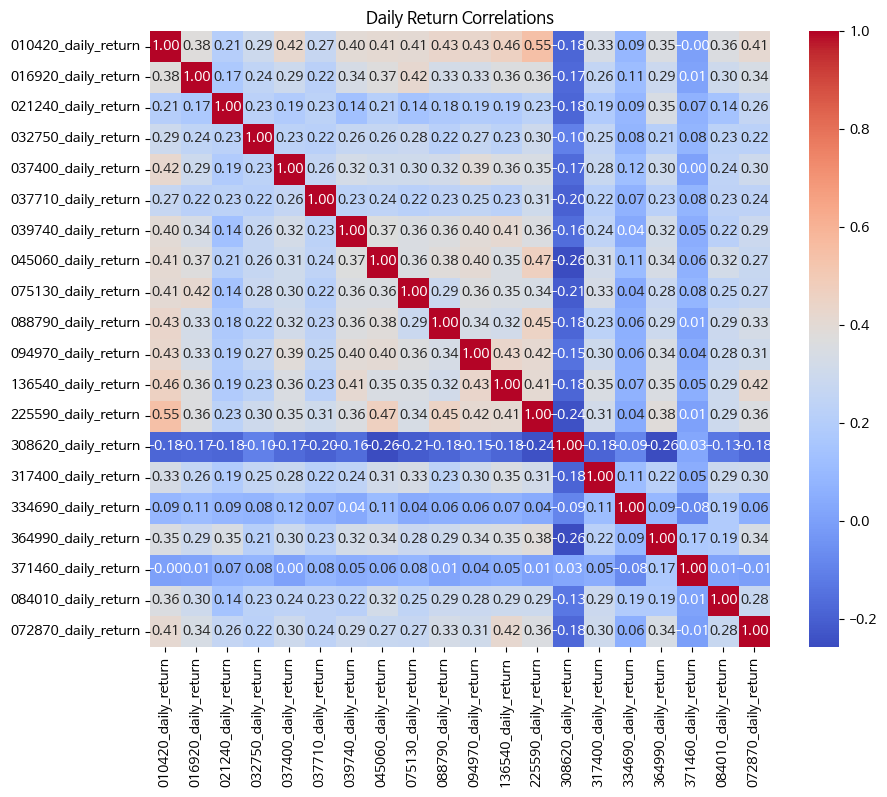

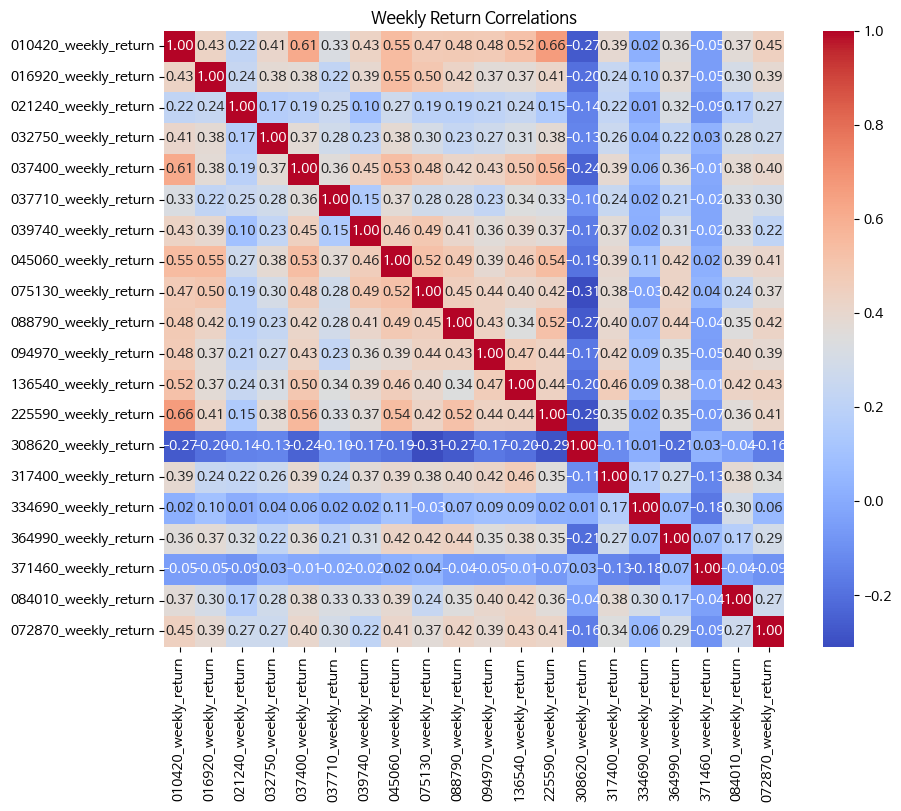

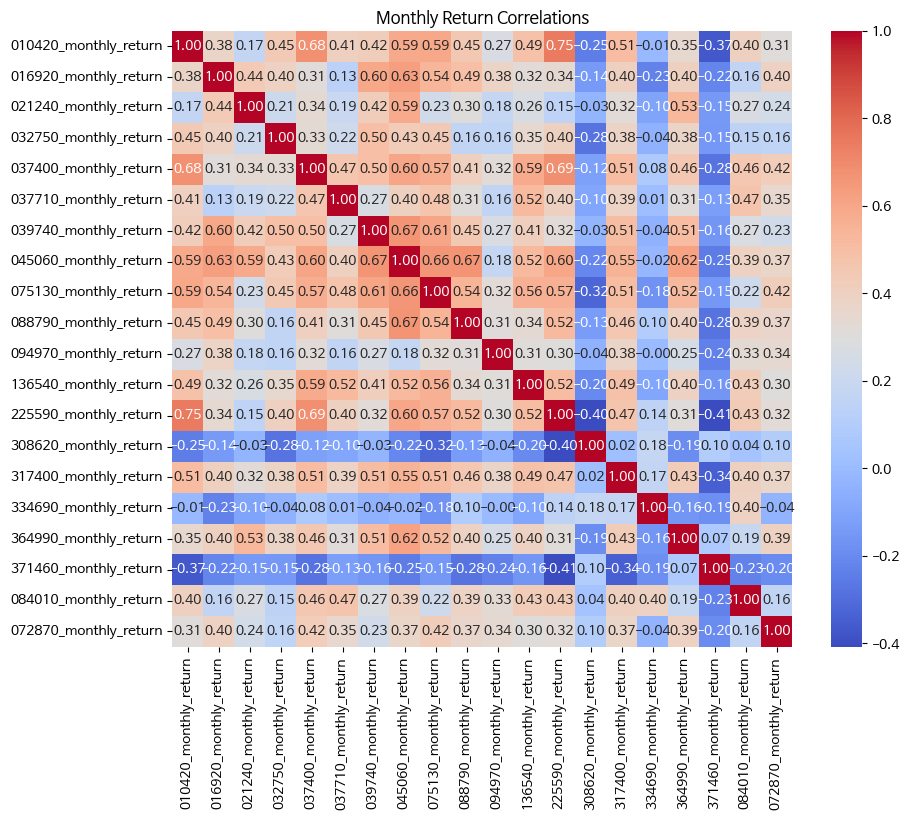

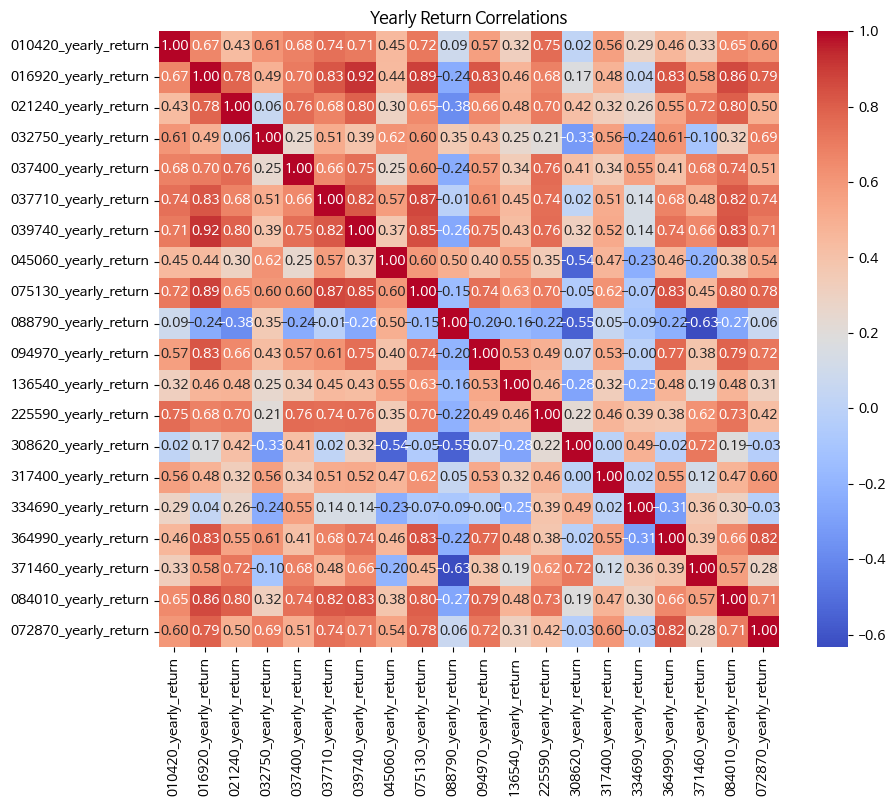

Daily average correlations per stock:
010420: nan
016920: nan
021240: nan
032750: nan
037400: nan
037710: nan
039740: nan
045060: nan
075130: nan
088790: nan
094970: nan
136540: nan
225590: nan
308620: nan
317400: nan
334690: nan
364990: nan
371460: nan
084010: nan
072870: nan
Weekly average correlations per stock:
010420: nan
016920: nan
021240: nan
032750: nan
037400: nan
037710: nan
039740: nan
045060: nan
075130: nan
088790: nan
094970: nan
136540: nan
225590: nan
308620: nan
317400: nan
334690: nan
364990: nan
371460: nan
084010: nan
072870: nan
Monthly average correlations per stock:
010420: nan
016920: nan
021240: nan
032750: nan
037400: nan
037710: nan
039740: nan
045060: nan
075130: nan
088790: nan
094970: nan
136540: nan
225590: nan
308620: nan
317400: nan
334690: nan
364990: nan
371460: nan
084010: nan
072870: nan
Yearly average correlations per stock:
010420: nan
016920: nan
021240: nan
032750: nan
037400: nan
037710: nan
039740: nan
045060: nan
075130: nan
088790: nan
0949

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Assuming you're using seaborn for heatmap

# Assuming you have a function that fetches market data
def get_market_data( start_date, end_date,stock_code):
    df=stock.get_market_ohlcv(start_date, end_date,stock_code)
    return df
# List of stock codes - this should be the list of stocks you are interested in.
stock_codes = ['010420', '016920', '021240', '032750', '037400', '037710',
'039740',
'045060',
'075130',
'088790',
'094970',
'136540',
'225590',

'308620',
'317400',
'334690',
'364990',

'371460',
'084010',  # 대한제강 
        '072870', #메가 스터디 
              
              ] # Up to 20 stock codes

# Dictionary to hold data for each stock
stock_data = {}

# Fetch the market data for each stock and store it in the dictionary
for code in stock_codes:
    df = get_market_data( "20160102", "20231220",code)
    df.index = pd.to_datetime(df.index)
    stock_data[code] = df

# Now, let's calculate the returns and correlations
returns = pd.DataFrame(index=stock_data[stock_codes[0]].index)

for code in stock_codes:
    df = stock_data[code]
    # Assuming '종가' is the closing price column in your DataFrames
    for period, label in zip([1, 5, 20, 252], ['daily', 'weekly', 'monthly', 'yearly']):
        returns[f'{code}_{label}_return'] = df['종가'].pct_change(periods=period)

# Drop any NaN values that resulted from the pct_change calculation
returns.dropna(inplace=True)

# Calculate correlation matrix for different timeframes
correlation_matrices = {
    timeframe: returns.filter(regex=f'_{timeframe}_').corr()
    for timeframe in ['daily', 'weekly', 'monthly', 'yearly']
}

# Visualize the correlation matrices
for timeframe, matrix in correlation_matrices.items():
    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title(f'{timeframe.capitalize()} Return Correlations')
    plt.show()

# Calculate the average correlation for each stock with all other stocks
stock_average_correlations = {timeframe: {} for timeframe in timeframes}

for timeframe, matrix in correlation_matrices.items():
    for stock_code in stock_codes:
        # Select the stock's correlations with all other stocks
        stock_correlations = matrix.filter(regex=f'^{stock_code}_').drop(f'{stock_code}_{timeframe}_return', axis=1)
        # Calculate the mean correlation excluding self-correlation
        mean_correlation = stock_correlations.mean(axis=1)
        # Store the average correlation for the stock
        stock_average_correlations[timeframe][stock_code] = mean_correlation.iloc[0]

# Example output of average correlations per stock
for timeframe, stock_corrs in stock_average_correlations.items():
    print(f"{timeframe.capitalize()} average correlations per stock:")
    for stock_code, avg_corr in stock_corrs.items():
        print(f"{stock_code}: {avg_corr:.2f}")


In [14]:
# Calculate the average correlation for each stock with all other stocks
stock_average_correlations = {timeframe: {} for timeframe in timeframes}

for timeframe, matrix in correlation_matrices.items():
    for stock_code in stock_codes:
        # Select the stock's correlations with all other stocks
        stock_correlations = matrix.filter(regex=f'^{stock_code}_').drop(f'{stock_code}_{timeframe}_return', axis=1)
        # Calculate the mean correlation excluding self-correlation
        mean_correlation = stock_correlations.mean(axis=1)
        # Store the average correlation for the stock
        stock_average_correlations[timeframe][stock_code] = mean_correlation.iloc[0]

# Example output of average correlations per stock
for timeframe, stock_corrs in stock_average_correlations.items():
    print(f"{timeframe.capitalize()} average correlations per stock:")
    for stock_code, avg_corr in stock_corrs.items():
        print(f"{stock_code}: {avg_corr:.2f}")

Daily average correlations per stock:
010420: nan
016920: nan
021240: nan
032750: nan
037400: nan
037710: nan
039740: nan
045060: nan
075130: nan
088790: nan
094970: nan
136540: nan
225590: nan
228790: nan
308620: nan
317400: nan
334690: nan
364990: nan
365780: nan
371460: nan
Weekly average correlations per stock:
010420: nan
016920: nan
021240: nan
032750: nan
037400: nan
037710: nan
039740: nan
045060: nan
075130: nan
088790: nan
094970: nan
136540: nan
225590: nan
228790: nan
308620: nan
317400: nan
334690: nan
364990: nan
365780: nan
371460: nan
Monthly average correlations per stock:
010420: nan
016920: nan
021240: nan
032750: nan
037400: nan
037710: nan
039740: nan
045060: nan
075130: nan
088790: nan
094970: nan
136540: nan
225590: nan
228790: nan
308620: nan
317400: nan
334690: nan
364990: nan
365780: nan
371460: nan
Yearly average correlations per stock:
010420: nan
016920: nan
021240: nan
032750: nan
037400: nan
037710: nan
039740: nan
045060: nan
075130: nan
088790: nan
0949

In [26]:
# 문자열을 실수로 변환하는 함수
import math
def convert_to_float(x):
    try:
        return float(x.replace(',', ''))  # 콤마 제거 후 실수로 변환
    except:
        return x

# '종가', '시가' 열의 값들을 실수로 변환합니다.
df['종가'] = df['종가'].apply(convert_to_float)
df['시가'] = df['시가'].apply(convert_to_float)

# 일별 수익률을 계산합니다. (당일 종가 / 당일 시가 - 1)
df['수익률'] = df['종가'] / df['시가'] - 1

# 수익률의 표준편차를 계산합니다.
std_dev = df['수익률'].std()

# 연간 표준편차 계산
annual_std_dev = std_dev * math.sqrt(12)


print(std_dev)

print(annual_std_dev)

0.08301236377351898
0.2875632634242499


In [32]:
# # 첫 번째 행의 '종가' (2001년 1월 1일)
# initial_price = df.iloc[-1]['종가']

# # 마지막 행의 '종가' (현재)
# current_price = df.iloc[0]['종가']

# # 총 수익률 계산 ((현재 가격 / 초기 가격) - 1)
# total_return = (current_price / initial_price) - 1

# print(f"2001년 01월부터 현재까지의 총 수익률: {total_return * 100:.2f}%")


import pandas as pd

# 첫 번째 행의 '종가' (2001년 1월 1일)
initial_price = df.iloc[-1]['종가']

# 마지막 행의 '종가' (현재)
current_price = df.iloc[0]['종가']

# 데이터의 시작 날짜와 끝 날짜
start_date = pd.to_datetime(df.index[-1])
end_date = pd.to_datetime(df.index[0])

# 투자 기간 (년)
duration_years = (end_date - start_date).days / 365.25

# 총 수익률 계산 ((현재 가격 / 초기 가격) - 1)
total_return = (current_price / initial_price) - 1

# 연환산 수익률 ((1 + 총 수익률)^(1/투자기간) - 1)
annualized_return = ((1 + total_return)**(1/duration_years)) - 1

print(f"2001년 01월부터 현재까지의 연환산 수익률: {annualized_return * 100:.2f}%")








2001년 01월부터 현재까지의 연환산 수익률: 0.43%


In [ ]:
위 데이터는 월별 데이터이기 때문에 계산된 값은 그럼 월별 수익률의 표준편차가 되는거니?

In [18]:
import pandas as pd

# 코웨이의 일별 수익률 데이터를 가져옵니다.
df2 = pd.read_csv("C:/AI/pythonProject/venv/playing_alone/kospi_month.csv")


In [19]:
df2=df2.set_index("날짜")

In [20]:
df.head(2)

,날짜,종가,시가,고가,저가,거래량,변동 %
0,2023- 09- 01,"2,465.07","2,551.93","2,611.00","2,445.51",7.81B,-3.57%
1,2023- 08- 01,"2,556.27","2,644.34","2,668.21","2,482.06",12.29B,-2.90%


In [33]:
tickers = stock.get_market_ticker_list("20190225", market="KOSDAQ")
print(len(tickers))

1328


In [39]:
import pandas as pd
import datetime
import time
import os

# 시작 연도와 현재 연도 설정
start_year = 1990
current_year = datetime.datetime.now().year

# 상장 종목 리스트 수집
all_tickers = set()

for year in range(start_year, current_year + 1):
    date_str = f"{year}1231"  # 해당 연도의 마지막 날짜

    # 코스닥 시장 종목 수집
    tickers_kosdaq = stock.get_market_ticker_list(date_str, market='KOSDAQ')
    all_tickers.update(tickers_kosdaq)

    # 코스피 시장 종목 수집
    tickers_kospi = stock.get_market_ticker_list(date_str, market='KOSPI')
    all_tickers.update(tickers_kospi)

    # print(all_tickers)
    time.sleep(1)


In [40]:
len(all_tickers)

4852